<center> 
<h1> Data analysis programming project </h1>
<h4> Rafael Takata García </h4>
<h5> Spring 2024 </h5>
 </center>

School is a stage of formation in which we develop skills and knowledge like no other. Understanding the factors that affect student performance would help us create an educational system capable of maximizing learning and really take advantage of the education received.

In 2008, Paulo Cortez and Alice Silva dedicated themselves to collecting the largest number of features of some students in secondary schools in the country of Portugal. Two groups were studied, people who studied Portuguese and those who studied mathematics. For this project, we will work with the fisrt to try to develop a prediction model for the second.

The creation of a model capable of describing this relationship would tell us about the areas of opportunity within the nation's educational system in addition to significant insights about the country's youth.

### References

 
Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

### Variables

**The variables are the following:** 
 - school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
 - sex - student's sex (binary: 'F' - female or 'M' - male)
 - age - student's age (numeric: from 15 to 22)
 - address - student's home address type (binary: 'U' - urban or 'R' - rural)
 - famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
 - Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
 - Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
 - guardian - student's guardian (nominal: 'mother', 'father' or 'other')
 - traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
 - studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
 - failures - number of past class failures (numeric: n if 1<=n<3, else 4)
 - schoolsup - extra educational support (binary: yes or no)
 - famsup - family educational support (binary: yes or no)
 - paid - extra paid classes within the course subject (binary: yes or no)
 - activities - extra-curricular activities (binary: yes or no)
 - nursery - attended nursery school (binary: yes or no)
 - higher - wants to take higher education (binary: yes or no)
 - internet - Internet access at home (binary: yes or no)
 - romantic - with a romantic relationship (binary: yes or no)
 - famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
 - freetime - free time after school (numeric: from 1 - very low to 5 - very high)
 - goout - going out with friends (numeric: from 1 - very low to 5 - very high)
 - Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - health - current health status (numeric: from 1 - very bad to 5 - very good)
 - absences - number of school absences (numeric: from 0 to 93)
 - These grades are related to the course subject for Portuguese:
 - G1 - first period grade (numeric: from 0 to 20)
 - G2 - second period grade (numeric: from 0 to 20)
 - G3 - final grade (numeric: from 0 to 20, output target)


### Libraries

In [279]:
import numpy as np #Work with arrays
import pandas as pd #Dataframes
import seaborn as sns #Heatmap
import matplotlib.pyplot as plt #Plotting for graphs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

### Creation of the dataframe and general info

In [280]:
#Creation of the dataframe
porclass_df = pd.read_csv('../data/raw/student-por.csv')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [281]:
#We have 649 rows and 33 columns
porclass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [282]:
# Unique values
porclass_df.apply(lambda x: x.unique())

school                                                 [GP, MS]
sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 1, 2]
schoolsup                               

Quick Data Visualization

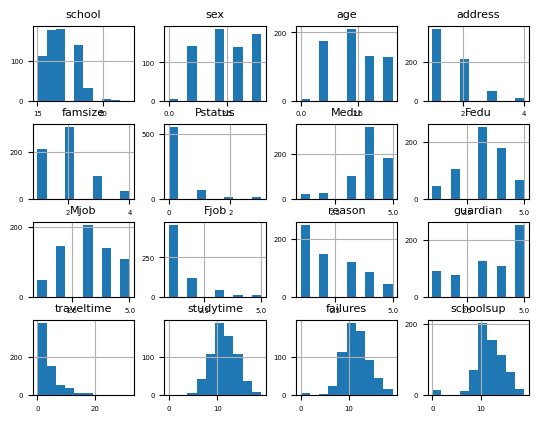

In [283]:
axes = porclass_df.hist(column=porclass_df.columns, xlabelsize=5, ylabelsize=5)
#This is to change the size of the titles so it's easier to visualize
for i, column in enumerate(axes.flatten()): 
    column.set_title(porclass_df.columns[i], fontsize=8)

#### Data cleaning

As we saw in the description of the variables, there are many nominal or Boolean type variables that we cannot really handle since they are in text, so it is necessary to change them to number before we can generate the relationships.

In [284]:
# variables of yes or no
yn_var = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
# Two options categorical variables 
bool_var = ['school', 'sex', 'address', 'famsize', 'Pstatus']

In [285]:
#replace the yes or no variables
def yn_var_replace(dataframe, list):
    for x in list:
        dataframe[x] = dataframe[x].replace({'yes': 1, 'no': 0})
yn_var_replace(porclass_df, yn_var)
# Replace the categorical variable that only have two options
def bool_var_replace(dataframe, list):
    for x in list:
        unique_values = dataframe[x].unique()
        dataframe[x] = dataframe[x].replace({unique_values[0] : 1, unique_values[1]: 0})
bool_var_replace(porclass_df, bool_var)

In [286]:
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,1,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,1,1,17,1,1,0,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,1,1,15,1,0,0,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,1,1,15,1,1,0,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,1,1,16,1,1,0,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Now I will use the one-hot codification for the `Mjob` and `Fjob`

In [287]:
porclass_df['Mjob'].unique(), porclass_df['Fjob'].unique()
# They are the same, so we can make the a list that has the same values of both

(array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object))

In [288]:
job_values = list(porclass_df['Mjob'].unique())
job_values

['at_home', 'health', 'other', 'services', 'teacher']

In [289]:
porclass_df = pd.get_dummies(porclass_df, columns = ['Mjob', 'Fjob'])
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,1,1,18,1,1,1,4,4,course,mother,...,True,False,False,False,False,False,False,False,False,True
1,1,1,17,1,1,0,1,1,course,father,...,True,False,False,False,False,False,False,True,False,False
2,1,1,15,1,0,0,1,1,other,mother,...,True,False,False,False,False,False,False,True,False,False
3,1,1,15,1,1,0,4,2,home,mother,...,False,True,False,False,False,False,False,False,True,False
4,1,1,16,1,1,0,3,3,home,father,...,False,False,True,False,False,False,False,True,False,False


Let's create a function tu concatenate the two one_hots

In [290]:
def concatenate_one_hot(dataframe, list):
    for x in list:
        mom_values = str('Mjob_' + x)
        dad_values = str('Fjob_' + x)
        #Concatenate
        dataframe[x] = dataframe[mom_values] + dataframe[dad_values]
        #Drop the ones that i have already used
        dataframe.drop(columns=[mom_values, dad_values], inplace=True)
concatenate_one_hot(porclass_df, job_values)
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Walc,health,absences,G1,G2,G3,at_home,other,services,teacher
0,1,1,18,1,1,1,4,4,course,mother,...,1,False,4,0,11,11,True,False,False,True
1,1,1,17,1,1,0,1,1,course,father,...,1,False,2,9,11,11,True,True,False,False
2,1,1,15,1,0,0,1,1,other,mother,...,3,False,6,12,13,12,True,True,False,False
3,1,1,15,1,1,0,4,2,home,mother,...,1,True,0,14,14,14,False,False,True,False
4,1,1,16,1,1,0,3,3,home,father,...,2,False,0,11,13,13,False,True,False,False


Now let's make our lives easier and use the label encoder from scikit

In [291]:
labelencoder = LabelEncoder()
porclass_df['reason'] = labelencoder.fit_transform(porclass_df['reason'])

In [292]:
porclass_df['guardian'] = labelencoder.fit_transform(porclass_df['guardian'])
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Walc,health,absences,G1,G2,G3,at_home,other,services,teacher
0,1,1,18,1,1,1,4,4,0,1,...,1,False,4,0,11,11,True,False,False,True
1,1,1,17,1,1,0,1,1,0,0,...,1,False,2,9,11,11,True,True,False,False
2,1,1,15,1,0,0,1,1,2,1,...,3,False,6,12,13,12,True,True,False,False
3,1,1,15,1,1,0,4,2,1,1,...,1,True,0,14,14,14,False,False,True,False
4,1,1,16,1,1,0,3,3,1,0,...,2,False,0,11,13,13,False,True,False,False


##### To reduce a few columns, I'm going to combinate the variables that talk about similar things

I will make a category to sum the Parents education

In [293]:
porclass_df['Pedu'] = porclass_df['Fedu'] + porclass_df['Medu']
porclass_df = porclass_df.drop(columns= ['Fedu', 'Medu'], axis = 'columns')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,health,absences,G1,G2,G3,at_home,other,services,teacher,Pedu
0,1,1,18,1,1,1,0,1,2,2,...,False,4,0,11,11,True,False,False,True,8
1,1,1,17,1,1,0,0,0,1,2,...,False,2,9,11,11,True,True,False,False,2
2,1,1,15,1,0,0,2,1,1,2,...,False,6,12,13,12,True,True,False,False,2
3,1,1,15,1,1,0,1,1,1,3,...,True,0,14,14,14,False,False,True,False,6
4,1,1,16,1,1,0,1,0,1,2,...,False,0,11,13,13,False,True,False,False,6


Another column for the total alcohol consumption:

In [294]:
porclass_df['alcohol'] = porclass_df['Dalc'] + porclass_df['Walc']
porclass_df = porclass_df.drop(columns= ['Dalc', 'Walc'], axis = 'columns')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,absences,G1,G2,G3,at_home,other,services,teacher,Pedu,alcohol
0,1,1,18,1,1,1,0,1,2,2,...,4,0,11,11,True,False,False,True,8,2
1,1,1,17,1,1,0,0,0,1,2,...,2,9,11,11,True,True,False,False,2,2
2,1,1,15,1,0,0,2,1,1,2,...,6,12,13,12,True,True,False,False,2,5
3,1,1,15,1,1,0,1,1,1,3,...,0,14,14,14,False,False,True,False,6,2
4,1,1,16,1,1,0,1,0,1,2,...,0,11,13,13,False,True,False,False,6,3


This is not supposed to be here, I just wanted to see the score if we only predict column `G3`

In [295]:
X = porclass_df.drop(columns = ['G3'], axis = 1)
y = porclass_df['G3']

In [296]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 3)
ln = LinearRegression()
ln.fit(x_train, y_train)

LinearRegression()

In [297]:
ln.score(x_test, y_test)

0.8849649341704309

#### Target column

Finally let's create the target column with the califications

In [298]:
porclass_df['Grade'] = porclass_df['G1'] + porclass_df['G2'] + porclass_df['G3']
porclass_df = porclass_df.drop(columns=['G1', 'G2', 'G3'], axis = 'columns')
porclass_df.tail() #Now we have a grade from 0 to 60

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,goout,health,absences,at_home,other,services,teacher,Pedu,alcohol,Grade
644,0,1,19,0,1,0,0,1,1,3,...,2,False,4,False,True,True,False,5,3,31
645,0,1,18,1,0,0,0,1,1,2,...,4,False,4,False,False,True,True,4,2,46
646,0,1,18,1,1,0,0,1,2,2,...,1,False,6,False,True,False,False,2,2,32
647,0,0,17,1,0,0,0,1,2,1,...,5,False,6,False,False,True,False,4,7,30
648,0,0,18,0,0,0,0,1,3,1,...,1,False,4,False,True,True,False,5,7,32


Now let's see the distribution of grades.

In [299]:
porclass_df['Grade'].skew(), porclass_df['Grade'].kurt()

(-0.22640562600058028, 0.6043362956597269)

<Axes: >

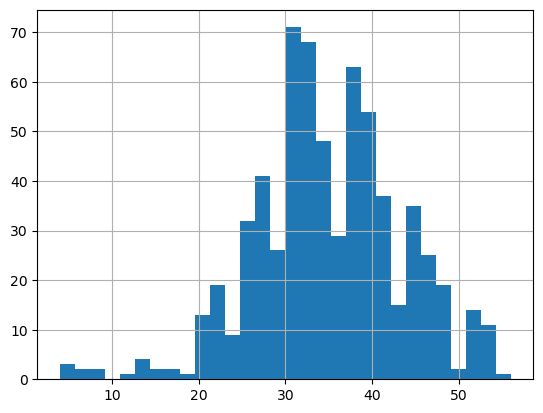

In [300]:
porclass_df['Grade'].hist(bins = 30)

Since it's way too difficult for an algorithm to predict 1 of 60, we are going to separate and classificate the `Grades` in ranges of 10. By doing this, we lose precision of the grades but improve the performance of our model without losing that much information.

In [301]:
#Create the range of values
ranges = [0, 10, 20, 30, 40, 50, 60, float('inf')]
labels = [0, 1, 2, 3, 4, 5, 6]
porclass_df['Grade'] = pd.cut(porclass_df['Grade'], bins=ranges, labels=labels, right=False)


In [302]:
porclass_df['Grade']

0      2
1      3
2      3
3      4
4      3
      ..
644    3
645    4
646    3
647    3
648    3
Name: Grade, Length: 649, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

#### Correlations 

Let's see the correlations between the Grade variable and the rest:

In [303]:
porclass_df.corr()['Grade'].sort_values(ascending=False)

Grade         1.000000
higher        0.321995
school        0.276223
Pedu          0.263379
studytime     0.260821
internet      0.158122
teacher       0.155974
address       0.152573
reason        0.139140
sex           0.110242
health        0.073744
activities    0.055506
famrel        0.054592
famsup        0.044588
nursery       0.032129
services      0.015215
Pstatus      -0.012360
famsize      -0.034461
goout        -0.056437
other        -0.057623
paid         -0.063319
schoolsup    -0.078804
romantic     -0.090252
guardian     -0.095340
freetime     -0.102804
absences     -0.106060
age          -0.122009
traveltime   -0.145462
at_home      -0.181043
alcohol      -0.187714
failures     -0.388604
Name: Grade, dtype: float64

<Axes: >

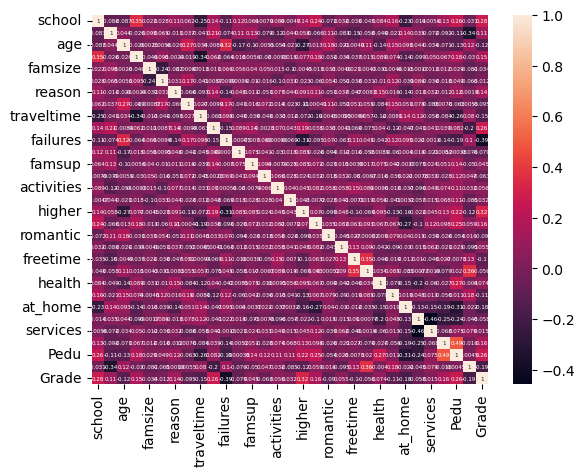

In [304]:
sns.heatmap(porclass_df.corr(), annot= True,  annot_kws = {'size':4})

Before we get into the testing, let's look for some more insights that we can get from the cleaned information

### EDA (Exploratory Data Analysis)

Im curious to see the relationship betweeen the `Pstatus` (Parent status) and the alcohol consumption.

Text(0.5, 1.0, 'Alcohol consumption depending the Status of the parents')

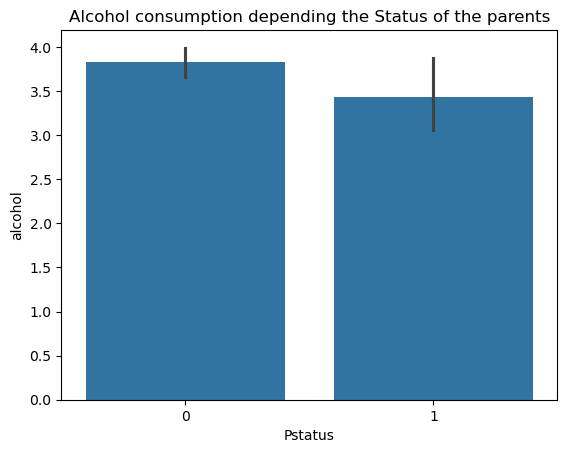

In [305]:
sns.barplot(x='Pstatus', y='alcohol', data = porclass_df)
plt.title('Alcohol consumption depending the Status of the parents')

There's an slightly increase of the alcohol consumption if the parents are not together.

#### Testing

In [306]:
X = porclass_df.drop(columns = ['Grade'], axis = 1)
y = porclass_df['Grade']

In [307]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 3)
x_train.shape, x_test.shape

((519, 30), (130, 30))

In [308]:
ln = LinearRegression()
ln.fit(x_train, y_train)


LinearRegression()

In [309]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [310]:
ln.score(x_test, y_test)

0.2452897765345191

In [311]:
tree.score(x_test, y_test)

-0.6086703762146002

### Conclusiones (primer avance)

 1. Vemos algunas relaciones que parecen intuitivas como por ejemplo el de las calificaciones G1, G2 y G3. 
 2. Es prácticamente nula la relación entre las personas que han reprobado alguna materia con las calificaciones.
 3. La gente con más materias reprobadas no buscan una educación más avanzada al nivel que están cursando.
 4. Hay muchas variables que realmente no aportan mucho al resultado de la investigación o no tienen una relación significativa con la variable objetivo.
 5. Suele haber una relación entre los trabajos de los papás.
